## Exploring the Impact of Weather and Climate on Bicycle sharing in London: A Comprehensive Report

### Outline
1. Introduction<br>
2. Data Source Details<br>
    2.1. Datasource1: Bicycle sharing Data in London<br>
    2.2. Datasource2: Weather and Climate Data of London<br>
3. Project Structure: ETL Pipeline<br>
4. Install Dependencies and Load Data<br>
    4.1. Import Packages<br>
    4.2. Load Data<br>
5. Data Exploration<br>
    5.1. Exploration of the Mobilithek Bicycle Traffic Data in London<br>
    5.2. Exploration of the Meteostat Weather and Climate Data of London<br>
    5.3. Exploration Summary<br>
6. Modifying and Combining Two Data Sources<br>
    6.1. Modifiying Bicycle sharing Data in London<br>
    6.2. Weather and Climate Data of London<br>
    6.3. Combining Two Data Sources<br>
7. Exploratory Data Analysis (EDA)<br>
    7.1. Descriptive Statistics<br>
    7.2. Histograms<br>
    7.3. Box Plots<br>
8. Questions and Analysis<br>
    8.1. How does the temperature in London city vary throughout the years?<br>
    8.2. How does the bicycle sharing in London city vary throughout the years?<br>
    8.3. Does temperature affect bicycle sharing in London city?<br>
    8.4. Is there any relation between the monthly precipitation total and average snow depth on the total bicycle sharing in London?<br>
    8.5. How do wind speed and sunshine duration impact the total bicycle traffic in London?<br>
    8.6. How do the different seasons impact the total bicycle sharing in London?<br>
9. Conclusion<br>

### 1. Introduction

This project aims to analyze **the weather and climate conditions of London and its bicycle sharing** generated from several automatic counting stations throughout the city to determine if London is a suitable city for an enthusiastic cyclist to live in. The project is using two open data sources:[https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset], which contains information on bicycle sharing in London, and [https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data], which provides weather and climate data of London.

Now, the question that interests us is: **How do the weather conditions in London impact bicycle sharing throughout the year?** And we will try to answer this question by focusing on several short questions.

1. How does the temperature in London city vary throughout the years?
2. How does the bicycle sharing in London city vary throughout the years?
3. Does temperature affect bicycle sharing in London city??
4. Is there any relation between the monthly precipitation total and average snow depth on the total bicycle sharing in London?
5. How do wind speed and sunshine duration impact the total bicycle traffic in London?
6. How do the different seasons impact the total bicycle sharing in London?

### 2. Data Source Details
#### 2.1. Datasource1: Bicycle sharing Data in London
* Source: [Kaggle][https://www.kaggle.com/]
* Metadata URL: [https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset]
* Sample Data URL: [(https://cycling.data.tfl.gov.uk/)]
* Data Type: CSV

This data source contains London's bicycle sharing data of London

#### 2.2. Datasource2: Weather and Climate Data of London
* Source: [Kaggle][https://www.kaggle.com/]
* Metadata URL: [https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data)]
* Sample Data URL: [https://www.ecad.eu/dailydata/index.php]
* Data Type: CSV

This data source will provide weather and climate data in London, including date, cloud cover, sunshine, global radiation, max_temp, mean_temp, min_temp, precipitation, pressure, snow_depth.

### 3. Project Structure: ETL Pipeline

The project follows a structured ETL (Extract, Transform, Load) pipeline approach, encompassing various directories and modules with specific functionalities. The `etl_pipeline.py` serves as the entry point for running the pipeline using the command `python etl_pipeline.py`, resulting in the generation of the final dataset stored in an SQLite database.

```bash
project/
├── config/                     # Configuration files and settings
│   ├── __init__.py
│   ├── basepipeline.py         # Configuration variables
│   └── kaggle.json             # Source information
├── data/                       # Data directory
│   ├── mian.sqlite             # Processed data
├── etl_pipeline.py             # ETL (Extract, Transform, Load) pipeline modules
├── tests_pipe.py               # all the unittests are wriiten here
├── tests.sh                    # Bash script for running all the test cases
├── exploration.ipynb           # Notebook for data exploration
├── report.ipynb                # Notebook for final project report
└── project-plan.md             # Project plan and documentation
```


### 4. Install Dependencies and Load Data

To install the dependencies for this project, run the following command to install the dependencies specified in the `requirements.txt` file: `pip install -r requirements.txt`

In [672]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



#### 4.1. Import Packages

In [673]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
import seaborn as sns

#### 4.2. Load Data

This section involves retrieving the data from a sqlite database and loading it into two Pandas DataFrames. And then merge these together for creating comprehensive report.

In [674]:
conn = sqlite3.connect('data/main.sqlite')
bicycle_sharing_df = pd.read_sql_query(f"SELECT * FROM bike_data", conn)
weather_data_df = pd.read_sql_query(f"SELECT * FROM weather", conn)
conn.close()

In [675]:
bicycle_sharing_df.head()


,timestamp,new bike shares,real temp,feel temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [676]:
weather_data_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### 5. Data Exploration

This section focuses on exploring two sets of data further: [Bicycle sharing Data in London](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset) and [Weather and Climate Data of London](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data).

#### 5.1. Exploration of the Bicycle Traffic Data in London

In [677]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


Now, let's examine the date range of the 'Bicycle sharing Data in London' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [678]:
date_df = pd.to_datetime(bicycle_sharing_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Bicycle sharing Data in Londan: {min_date} to {max_date}"

'Date Range of the Bicycle sharing Data in Londan: January-2015 to January-2017'

In [679]:
bicycle_sharing_df.head(6)

,timestamp,new bike shares,real temp,feel temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46.0,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0


In [680]:
bicycle_sharing_df.tail(6)

,timestamp,new bike shares,real temp,feel temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17408,2017-01-03 18:00:00,2220.0,5.0,1.0,81.0,22.0,2.0,0.0,0.0,3.0
17409,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224.0,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139.0,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


By examining the head and tail of the Bicycle sharing Data in London, we can observe that there is a lot of non holiday and not weekend values. Hence, we can verify the number of non holiday and non weekend.

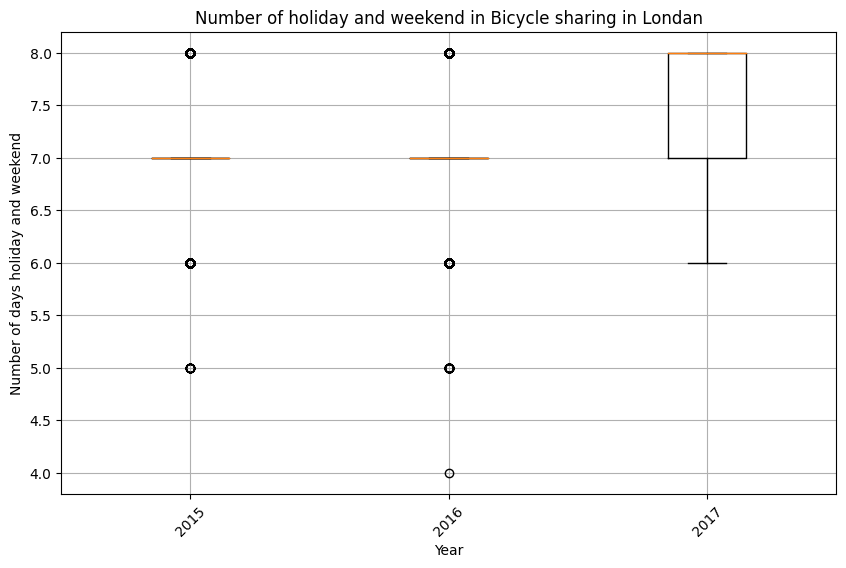

In [681]:
counting_stations_df = pd.DataFrame({'timestamp': bicycle_sharing_df['timestamp']})
counting_stations_df['Counting Stations'] = (bicycle_sharing_df.iloc[:, 1:] != 0).sum(axis=1)

# Extract the year from the date column
counting_stations_df['Year'] = counting_stations_df['timestamp'].str.split('-').str[0]

# Group the data by year
grouped_data = counting_stations_df.groupby('Year')['Counting Stations'].apply(list)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(grouped_data.values)

# Customize the plot
plt.title('Number of holiday and weekend in Bicycle sharing in Londan')
plt.xlabel('Year')
plt.ylabel('Number of days holiday and weekend')
plt.grid(True)

# Set the x-axis labels to show only the year
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index, rotation=45)

# Show the plot
plt.show()


From 2015 to 2017, to analyze we can examine the stacked bar chart showing the zero count and non-zero count for each station. The chart provides insights into how non holiday and non weekend values have consistently been the majority. This information helps us understand the availability and reliability of historical data.

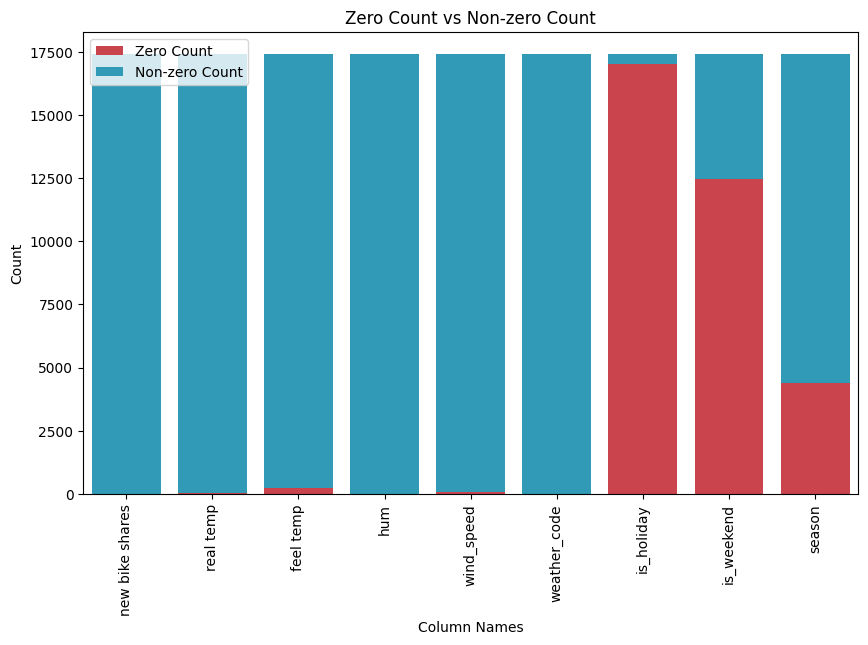

In [682]:
station_names = bicycle_sharing_df.columns[1:]
result_df = pd.DataFrame(columns=['station name', 'zero count', 'non zero count'])

for station_name in station_names:
    zero_count = (bicycle_sharing_df[station_name] == 0).sum()
    non_zero_count = (bicycle_sharing_df[station_name] != 0).sum()
    result_df.loc[len(result_df)] = [station_name, zero_count, non_zero_count]

# Create and customize the stacked bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=result_df, x='station name', y='zero count', color='#DF2E38', label='Zero Count')
sns.barplot(data=result_df, x='station name', y='non zero count', color='#19A7CE', bottom=result_df['zero count'], label='Non-zero Count')

# Customize the chart labels and title
plt.title('Zero Count vs Non-zero Count')
plt.xlabel('Column Names')
plt.ylabel('Count')
# plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.legend(loc="upper left")
plt.xticks(rotation=90)

plt.show()

Now, we want to examining the 'Bicycle sharing of London', to see if it has any null vlaues.

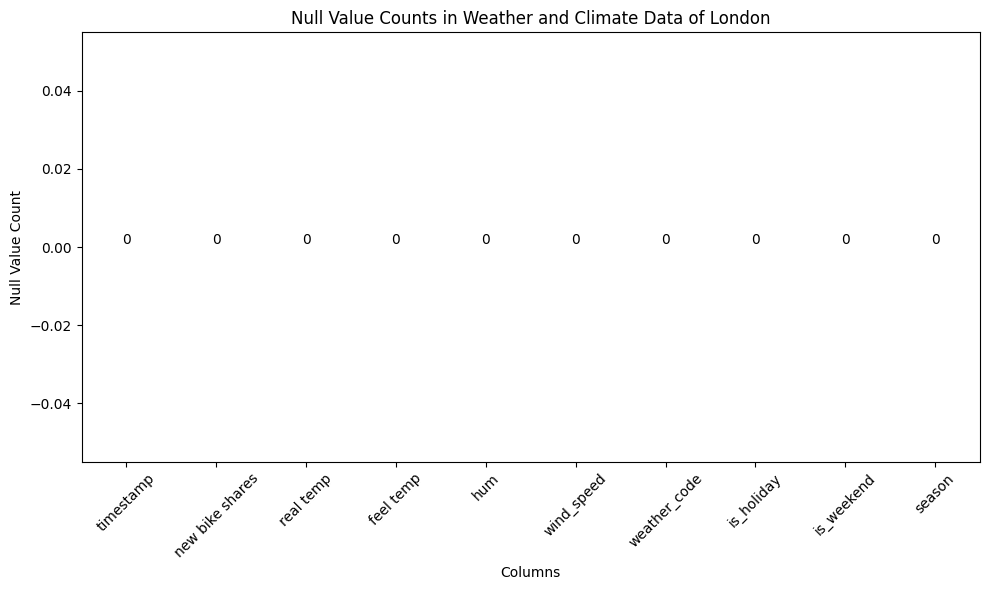

In [683]:
# Count the number of null values in each column
null_counts = bicycle_sharing_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of London')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

No null value was found in this dataset

#### 5.2. Exploration of the Meteostat Weather and Climate Data of London




In [684]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


Now, let's examine the date range of the 'Weather and Climate Data of London' to determine the available data period, starting from the minimum date and ending at the maximum date.

In [685]:
date_df = pd.to_datetime(weather_data_df['date'], format='%Y%m%d')
min_date = date_df.min().strftime('%B-%Y')
max_date = date_df.max().strftime('%B-%Y')
f"Date Range of the Weather and Climate Data of London: {min_date} to {max_date}"

'Date Range of the Weather and Climate Data of London: January-1979 to December-2020'

Now we will only be keeping the records from January 2015 to January 2017, as in our bike dataset that is our timeframe

In [686]:
# Convert the 'date' column to datetime format
weather_data_df['date'] = pd.to_datetime(weather_data_df['date'], format='%Y%m%d')

# Define the start and end dates for the desired range
start_date = pd.to_datetime('January-2015', format='%B-%Y')
end_date = pd.to_datetime('January-2017', format='%B-%Y')

# Create a boolean mask to filter the data
mask = (weather_data_df['date'] >= start_date) & (weather_data_df['date'] <= end_date)

# Apply the mask to filter the data
filtered_weather_data_df = weather_data_df[mask]

# Find the minimum and maximum dates in the filtered DataFrame
min_filtered_date = filtered_weather_data_df['date'].min()
max_filtered_date = filtered_weather_data_df['date'].max()

# Format the dates as needed
min_filtered_date_str = min_filtered_date.strftime('%B-%Y')
max_filtered_date_str = max_filtered_date.strftime('%B-%Y')

# Print the results
print(f"Minimum Date in Filtered Weather Data: {min_filtered_date_str}")
print(f"Maximum Date in Filtered Weather Data: {max_filtered_date_str}")
filtered_weather_data_df.info()

Minimum Date in Filtered Weather Data: January-2015
Maximum Date in Filtered Weather Data: January-2017
<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 13149 to 13880
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              732 non-null    datetime64[ns]
 1   cloud_cover       732 non-null    float64       
 2   sunshine          732 non-null    float64       
 3   global_radiation  731 non-null    float64       
 4   max_temp          732 non-null    float64       
 5   mean_temp         732 non-null    float64       
 6   min_temp          732 non-null    float64       
 7   precipitation     732 non-null    float64       
 8   pressure          732 non-null    float64       
 9   snow_depth        730 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 62.9 KB


Now, examining the 'Weather and Climate Data of London', it is apparent that the dataset contains a number of `null` values. Visualizing these `null` values allows us to assess their severity and identify columns that should be excluded from our reports.

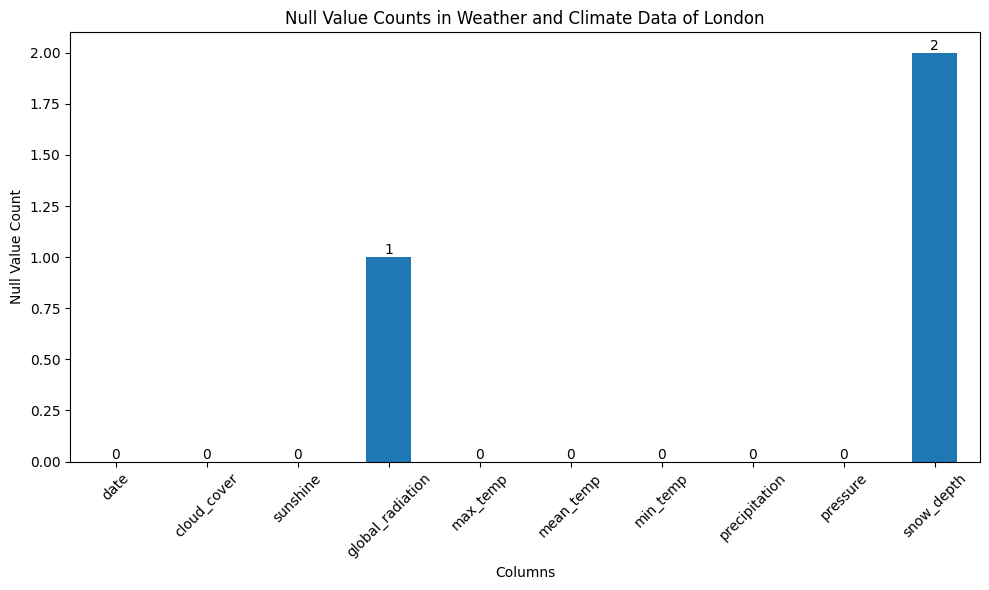

In [687]:
# Count the number of null values in each column
null_counts = filtered_weather_data_df.isnull().sum()

# Create a bar plot of null value counts
plt.figure(figsize=(10, 6))
ax = null_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts in Weather and Climate Data of London')
plt.xticks(rotation=45)

# Add text annotations for null count above each bar
for i, count in enumerate(null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Only 3 null value was found, so we can ignore such low number of null values.

#### 5.3. Exploration Summary

**Bicycle sharing Data in London**
* Data available: January-2015 to January-2017
* No of rows: 17414
* Remarks:
    - No null values, so no further data cleaning is necesaary.
    - Almost all the is_holiday values are zero.

**Weather and Climate Data of London**
* Data available: January-1979 to December-2020
* Necessary data: January-2015 to January-2017; so we filtered this ammount of data and rest are discurded
* No of rows orginally: 15341
* No of rows after cleaning: 732 
* Remarks: only 3 null values so we can ingnore those values.

### 6. Modifying and Combining Two Data Sources

#### 6.1. Modifiying Bicycle sharing Data in London

Based on the previous data exploration, we can drop some cloumn and then use the data in our calculation.
- We will drop the real temp and feel temp column as we have the mean temp value in the weather dataset of London.
- Rename a column 
- Take sum, mean and max from different column to fit the data

In [688]:
# Convert 'timestamp' to datetime and extract date
bicycle_sharing_df['timestamp'] = pd.to_datetime(bicycle_sharing_df['timestamp'])
bicycle_sharing_df['date'] = bicycle_sharing_df['timestamp'].dt.date


# Group by the new 'date' column and calculate the mean for each day
bicycle_sharing_df = bicycle_sharing_df[['date','new bike shares', 'hum','wind_speed','is_holiday','is_weekend','season']]
filtered_bicycle_sharing_df = bicycle_sharing_df.groupby('date').agg({'new bike shares':'sum',
                                                                      'hum':'mean',
                                                                      'wind_speed':'mean',
                                                                      'is_holiday':'max',
                                                                      'is_weekend':'max',
                                                                      'season':'max'})

filtered_bicycle_sharing_df= filtered_bicycle_sharing_df.reset_index()

# Rename columns to match the desired column names and rearrange the columns in the desired order
filtered_bicycle_sharing_df.rename(columns={'hum': 'humidity'}, inplace=True)

filtered_bicycle_sharing_df.head()

,date,new bike shares,humidity,wind_speed,is_holiday,is_weekend,season
0,2015-01-04,9234.0,94.270833,7.500000,0.0,1.0,3.0
1,2015-01-05,20372.0,80.312500,8.854167,0.0,0.0,3.0
2,2015-01-06,20613.0,78.895833,16.000000,0.0,0.0,3.0
3,2015-01-07,21064.0,78.108696,19.760870,0.0,0.0,3.0
4,2015-01-08,15601.0,79.312500,20.479167,0.0,0.0,3.0


#### 6.2. Weather and Climate Data of London

Based on the previous data exploration, we need to make the following changes in the weather data for London city:
- Fill in the missing values for the remaining columns with a few null counts. This can be done using methods like linear interpolation, which estimates the missing values based on nearby values.


In [689]:
# Perform linear interpolation to fill missing values using nearby values
filtered_weather_data_df = filtered_weather_data_df.copy()
filtered_weather_data_df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
# Assuming 'your_datetime_column' is your datetime64[ns] column
filtered_weather_data_df['date'] = pd.to_datetime(filtered_weather_data_df['date']).dt.date

filtered_weather_data_df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
13149,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0
13150,2015-01-02,3.0,5.4,45.0,6.2,8.6,8.0,8.6,102900.0,0.0
13151,2015-01-03,6.0,0.0,13.0,7.1,4.9,3.5,2.4,102400.0,0.0
13152,2015-01-04,8.0,0.0,13.0,10.0,2.9,-1.4,0.0,103530.0,0.0
13153,2015-01-05,8.0,0.0,13.0,10.4,4.9,-0.3,0.2,102910.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13876,2016-12-28,2.0,4.7,41.0,9.5,3.0,-2.2,0.2,104260.0,0.0
13877,2016-12-29,0.0,5.4,45.0,4.8,3.0,-3.5,0.4,103740.0,0.0
13878,2016-12-30,9.0,0.0,13.0,8.9,1.8,-1.1,0.0,103660.0,0.0
13879,2016-12-31,8.0,0.0,13.0,10.1,4.6,0.4,0.4,103090.0,0.0


#### 6.3. Combining Two Data Sources

Now, let's combine the modified bicycle traffic data and weather data into a single dataframe, which will represent the data for London city. The combined dataframe will contain the following columns:


In [690]:
final_combined_df = pd.merge(filtered_weather_data_df, filtered_bicycle_sharing_df, how="outer", on='date')
final_combined_df['date']=pd.to_datetime(final_combined_df['date']).dt.date

final_combined_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,new bike shares,humidity,wind_speed,is_holiday,is_weekend,season
0,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,3.0,5.4,45.0,6.2,8.6,8.0,8.6,102900.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,6.0,0.0,13.0,7.1,4.9,3.5,2.4,102400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,8.0,0.0,13.0,10.0,2.9,-1.4,0.0,103530.0,0.0,9234.0,94.270833,7.500000,0.0,1.0,3.0
4,2015-01-05,8.0,0.0,13.0,10.4,4.9,-0.3,0.2,102910.0,0.0,20372.0,80.312500,8.854167,0.0,0.0,3.0


### 7. Exploratory Data Analysis (EDA)

#### 7.1. Descriptive Statistics

In [691]:
final_combined_df.describe()


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,new bike shares,humidity,wind_speed,is_holiday,is_weekend,season
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4.990437,4.072951,114.506831,15.946585,12.021858,8.060929,1.583333,101658.866120,0.0,27268.454795,72.309018,15.954665,0.021918,0.286301,1.491781
std,2.337154,3.810502,84.244717,6.012830,5.343412,5.135806,3.940056,993.818486,0.0,8607.700254,9.501037,6.221691,0.146516,0.452342,1.118770
min,0.000000,0.000000,12.000000,2.600000,-0.500000,-5.900000,0.000000,97910.000000,0.0,4869.000000,46.916667,2.770833,0.000000,0.000000,0.000000
25%,3.000000,0.400000,40.000000,11.300000,7.800000,4.200000,0.000000,101105.000000,0.0,21940.750000,65.541667,11.208333,0.000000,0.000000,0.000000
50%,5.000000,3.300000,95.000000,15.500000,12.050000,8.450000,0.000000,101770.000000,0.0,27011.500000,72.479167,15.166667,0.000000,0.000000,1.000000
75%,7.000000,6.600000,182.000000,20.400000,16.200000,12.000000,1.400000,102290.000000,0.0,33431.250000,79.187500,19.906250,0.000000,1.000000,2.000000
max,9.000000,14.700000,339.000000,36.700000,28.700000,22.300000,51.600000,104380.000000,0.0,72504.000000,98.687500,41.900000,1.000000,1.000000,3.000000


The `describe()` function was used to generate descriptive statistics for the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

#### 7.2. Histograms

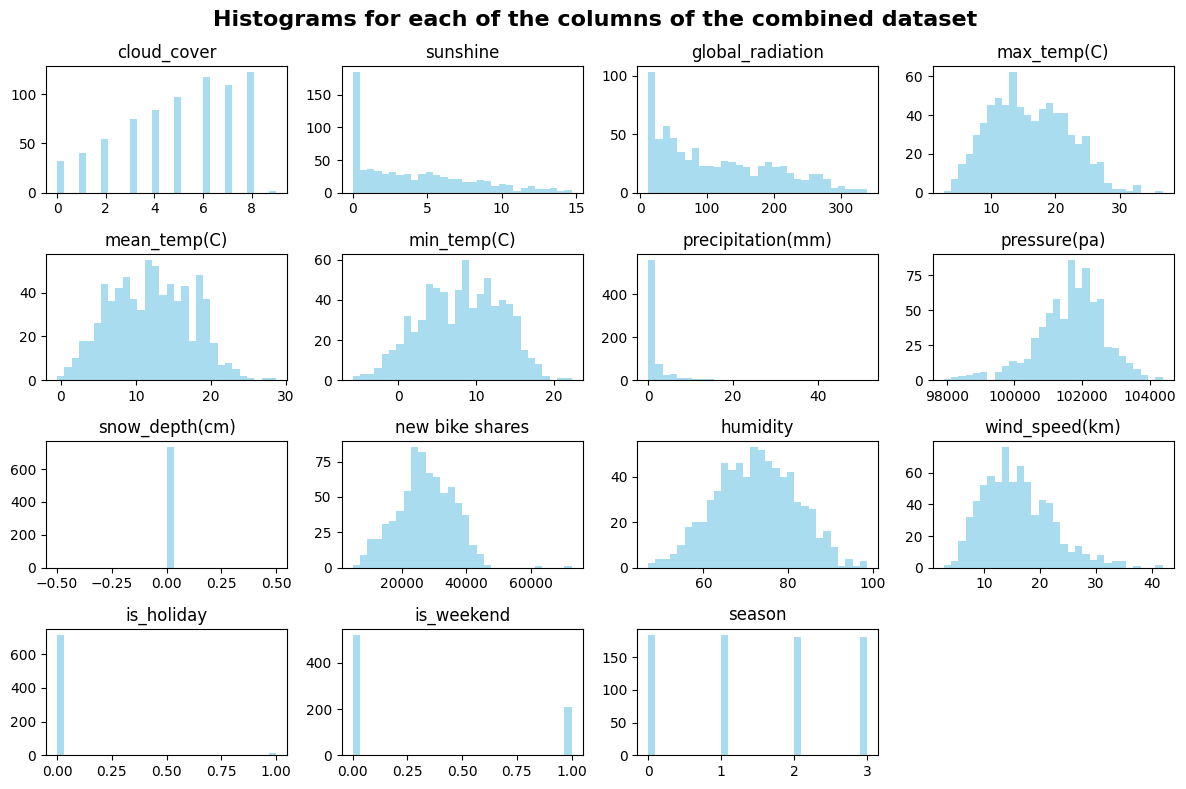

In [692]:
# Plot histograms
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))

cols = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth', 'new bike shares', 'humidity', 'wind_speed', 'is_holiday', 'is_weekend', 'season']
cols_name = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp(C)', 'mean_temp(C)', 'min_temp(C)', 'precipitation(mm)', 'pressure(pa)', 'snow_depth(cm)', 'new bike shares', 'humidity', 'wind_speed(km)', 'is_holiday', 'is_weekend', 'season']

for i, col in enumerate(cols):
    ax = axes[i // 4, i % 4]
    ax.hist(final_combined_df[col], bins=30, color='skyblue', alpha=0.7)
    ax.set_title(cols_name[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.delaxes(axes[3, 3])  # Remove empty subplot and hide axis labels

plt.suptitle('Histograms for each of the columns of the combined dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


- Histograms were created for each of the columns and it shows the distribution of values for columns such as 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth', 'new bike shares', 'humidity', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season'.
- The number of bins was set to 30, and kernel density estimation (KDE) was enabled to visualize the underlying distribution.

#### 7.3. Box Plots

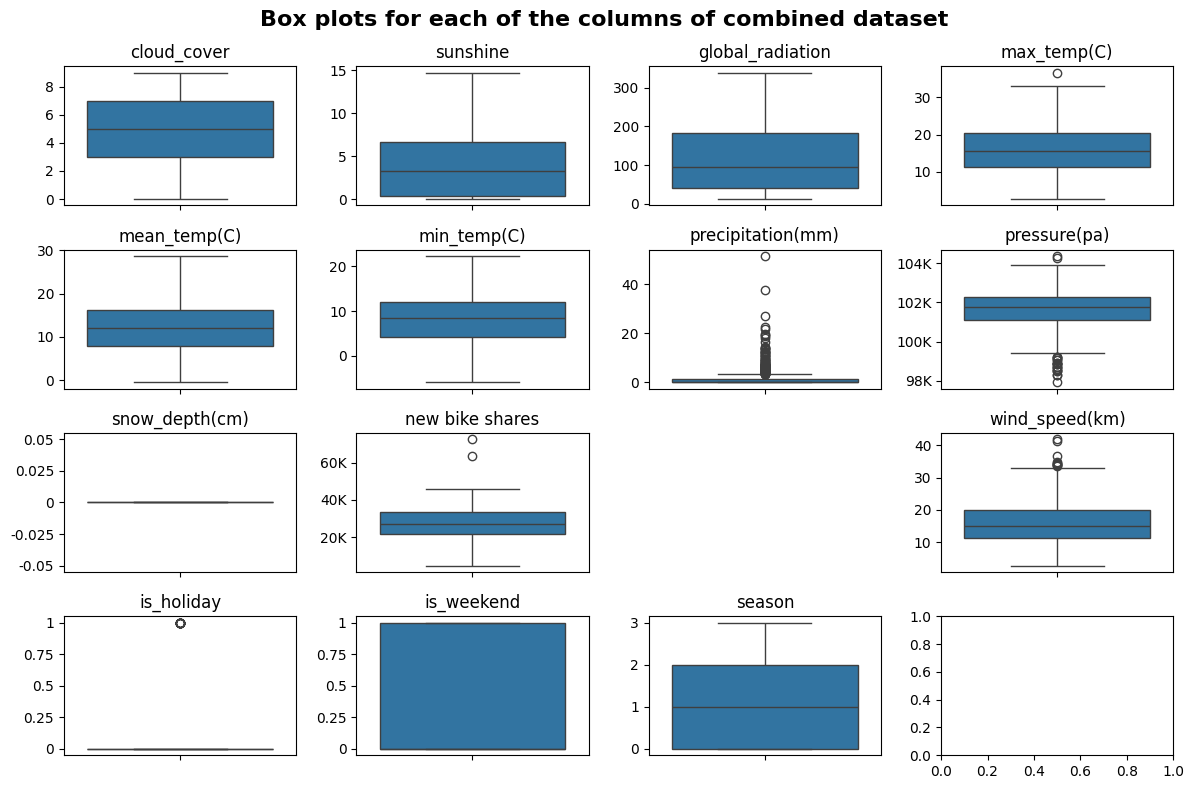

In [693]:
# Create box plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))
for i, col in enumerate(cols):
    ax = axes[i//4, i%4]  # Adjust the indexing here
    sns.boxplot(data=final_combined_df, y=col, ax=ax)
    ax.set_title(cols_name[i])
    ax.set_ylabel('')

    if col == 'pres':
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

fig.delaxes(axes[2, 2]) # Remove empty subplot and hide axis labels

plt.suptitle('Box plots for each of the columns of combined dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Box plots were created for each of the columns and each box plot provide information about the distribution, central tendency, and presence of outliers in the variables.

### 8. Questions and Analysis

#### 8.1. How does the temperature in London city vary throughout the years?

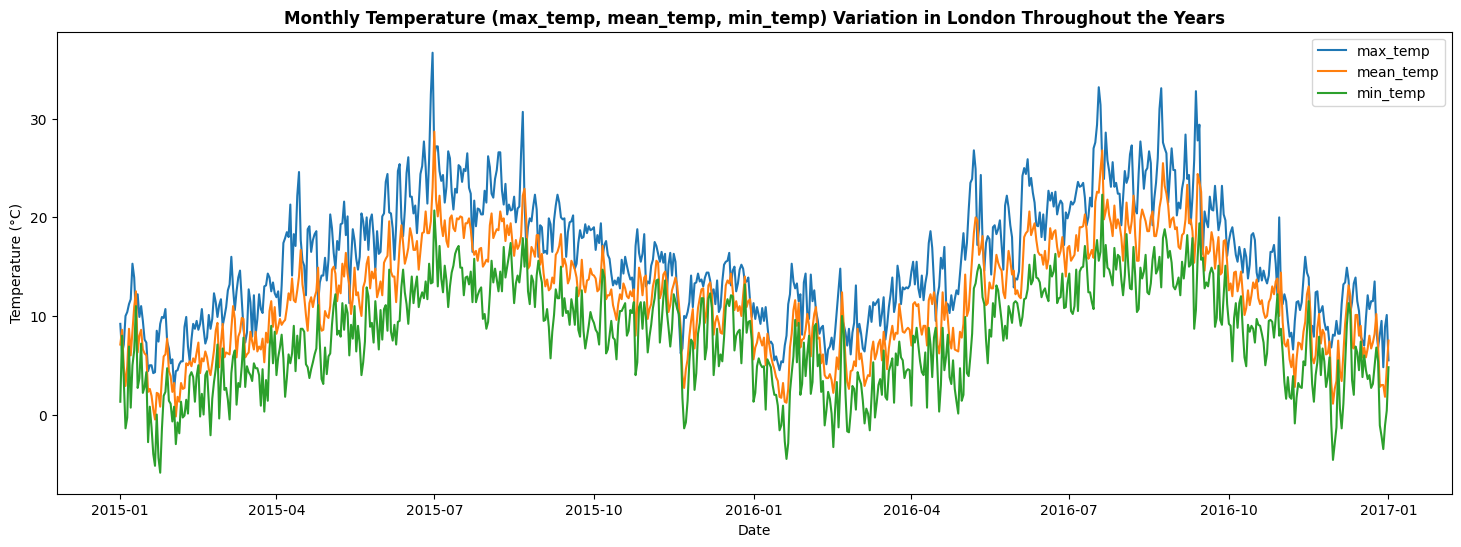

In [694]:
# Line plot of temperature variation
plt.figure(figsize=(18, 6))

for col in ['max_temp', 'mean_temp', 'min_temp']:
    #sns.lineplot(data=final_combined_df, x='date', y=col, label=col)
    plt.plot(final_combined_df['date'].to_numpy(), final_combined_df[col].to_numpy(), label=col)
    
#sns.lineplot(data=final_combined_df, x='date', y='max_temp', label='max_temp')
#plt.plot(final_combined_df['date'].to_numpy(), final_combined_df['max_temp'].to_numpy(), label='max_temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature (max_temp, mean_temp, min_temp) Variation in London Throughout the Years', fontweight='bold')
plt.legend(loc="upper right")
#plt.xticks(range(0, len(final_combined_df), 12), final_combined_df['date'].iloc[::12], rotation=0)
plt.show()



The temperature in London city exhibits significant variation throughout the years, following a seasonal pattern. It typically shows higher values during the summer months and lower values during the winter months. This variation can be observed by analyzing the average temperature (tavg), minimum temperature (tmin), and maximum temperature (tmax) data. By examining the temperature trends over the years, we can identify the seasonal patterns and understand the climatic changes in London.

#### 8.2. How does the bicycle traffic in london city vary throughout the years?

C:\Users\Piyal\AppData\Local\Temp\ipykernel_15056\2914127914.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels


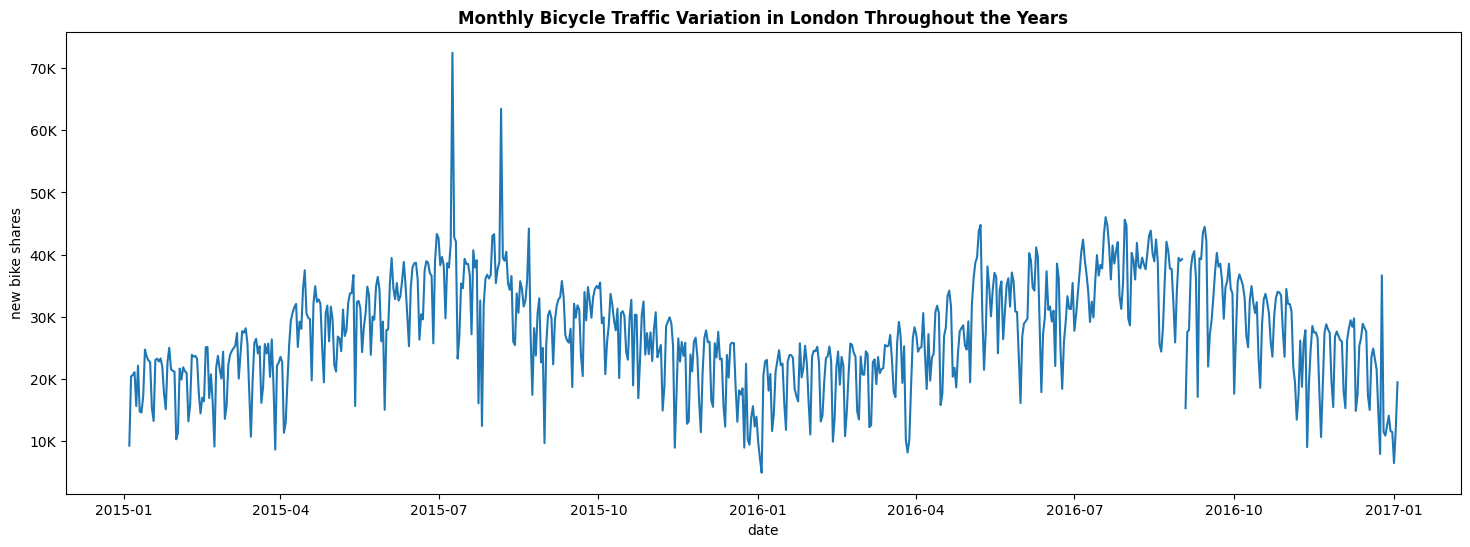

In [695]:
# Line plot of bicycle traffic variation
plt.figure(figsize=(18, 6))
#sns.lineplot(data=final_combined_df, x='date', y='new bike shares')
plt.plot(final_combined_df['date'].to_numpy(), final_combined_df['new bike shares'].to_numpy())


plt.xlabel('date')
plt.ylabel('new bike shares')
plt.title('Monthly Bicycle Traffic Variation in London Throughout the Years', fontweight='bold')
#plt.xticks(range(0, len(final_combined_df), 12), final_combined_df['date'].iloc[::12].str[-4:], rotation=0)
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels
plt.show()

Bicycle sharing in London city also displays variation throughout the years, reflecting the seasonal changes and potential influences of weather conditions. Similar to the temperature patterns, the bicycle traffic data exhibits fluctuations, with higher levels during favorable weather conditions and lower levels during unfavorable weather conditions. This suggests a relationship between weather and bicycle usage, where people tend to cycle more during pleasant weather conditions.

#### 8.3. Does temperature affect bicycle traffic in London city?

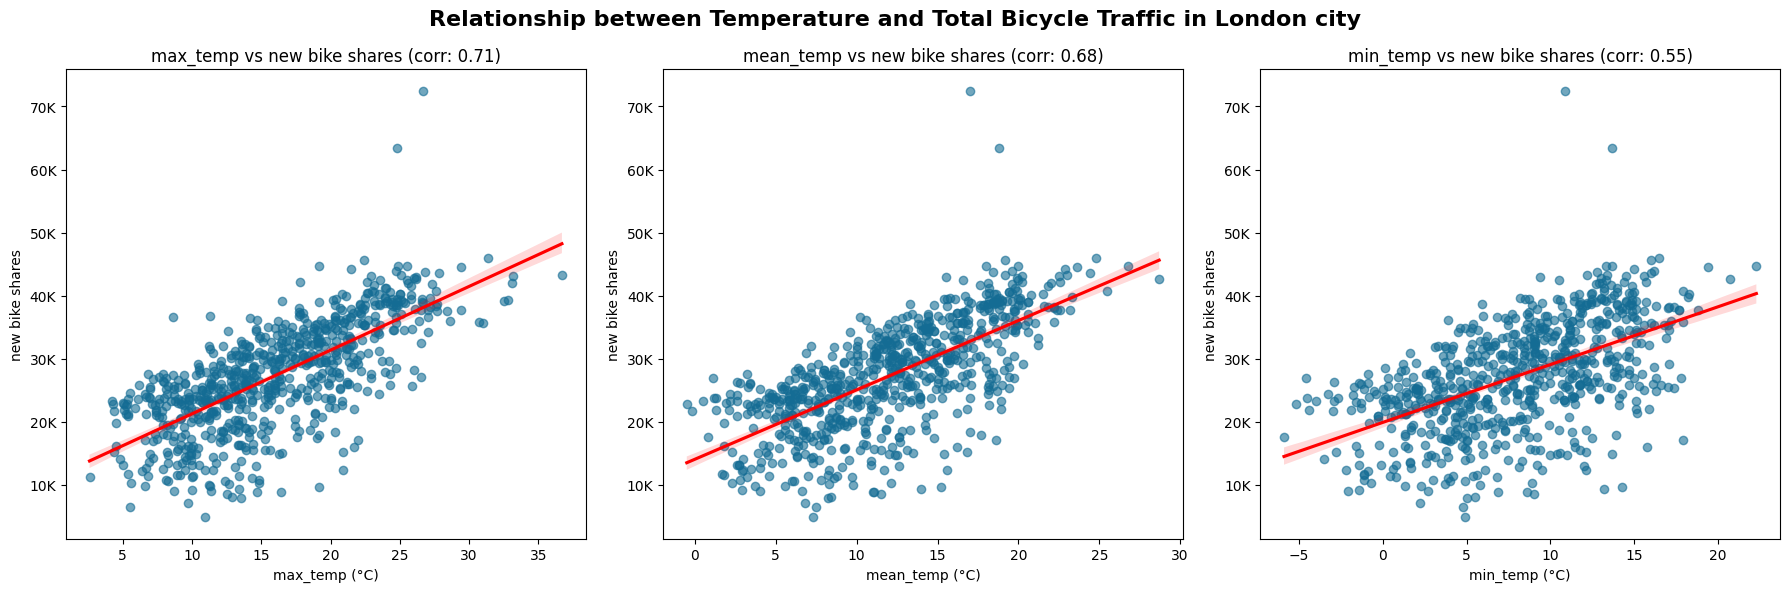

In [696]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(['max_temp', 'mean_temp', 'min_temp']):
    ax = axes[i]
    sns.regplot(data=final_combined_df, x=col, y='new bike shares', ax=ax,
                scatter_kws = {"color": "#146C94", "alpha": 0.6},
                line_kws = {"color": "red"},
                ci = 95)
    
    # Calculate the correlation between temperature ('max_temp', 'mean_temp', 'min_temp') and new bike shares
    correlation = final_combined_df[[col, 'new bike shares']].corr().iloc[0, 1]
    
    ax.set_title(f'{col} vs new bike shares (corr: {correlation:.2f})')
    ax.set_xlabel(col+' (°C)')
    ax.set_ylabel('new bike shares')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between Temperature and Total Bicycle Traffic in London city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Temperature significantly influences bicycle usage in London. An analysis of various temperature metrics ('max_temp', 'mean_temp', 'min_temp') alongside bicycle traffic data reveals a distinct correlation between the two. Higher temperatures, indicative of warmer conditions, are associated with an increase in bicycle traffic. On the other hand, a drop in temperatures, reflecting colder weather, leads to a decrease in bicycle usage. This evident correlation points to temperature being a key factor in determining people's choice to opt for bicycles as a means of transportation.

#### 8.4. Is there any relation between the monthly precipitation total and humidity on the total bicycle traffic in London?

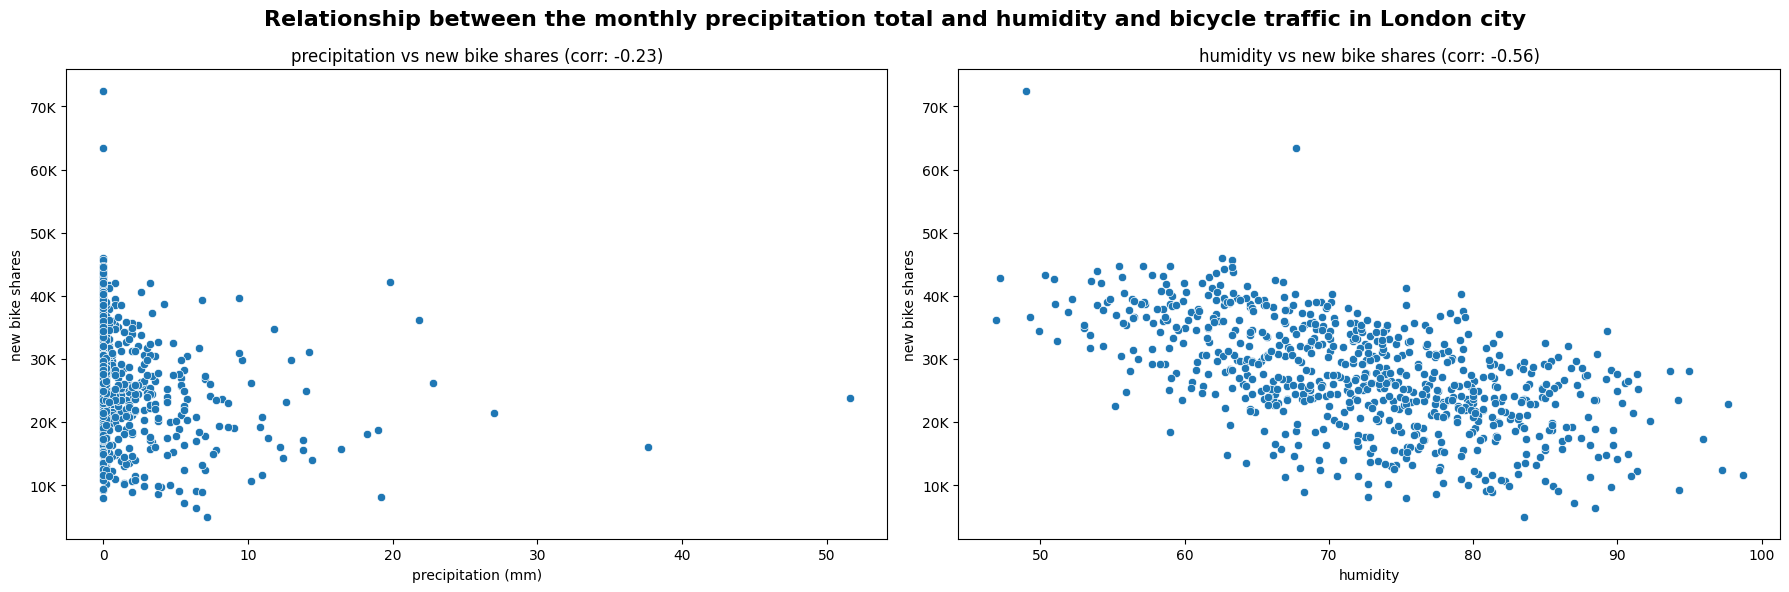

In [697]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, col_details in enumerate([('precipitation', 'precipitation (mm)'), ('humidity', 'humidity')]):
    col, col_name = col_details
    ax = axes[i]
    sns.scatterplot(data=final_combined_df, x=col, y='new bike shares', ax=ax)

    # Calculate the correlation between temperature (tavg, tmin, tmax) and total_traffic
    correlation = final_combined_df[[col, 'new bike shares']].corr().iloc[0, 1]
    
    ax.set_title(f'{col} vs new bike shares (corr: {correlation:.2f})')
    ax.set_xlabel(col_name)
    ax.set_ylabel('new bike shares')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between the monthly precipitation total and humidity and bicycle traffic in London city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

A reverse relation is found between the monthly precipitation total and bicycle traffic in London city. When there is less precipitation, bike sharing increases significantly. In precipitation levels throughout the year, there is s clear pattern or between the two variables(a negative correlation). Similarly, a more reverse correlation is observed between the humidity and total bicycle traffic. Meaning when the humidity is high, the bike sharing decreases.

#### 8.5. How do wind speed and sunshine duration impact the total bicycle traffic in London?

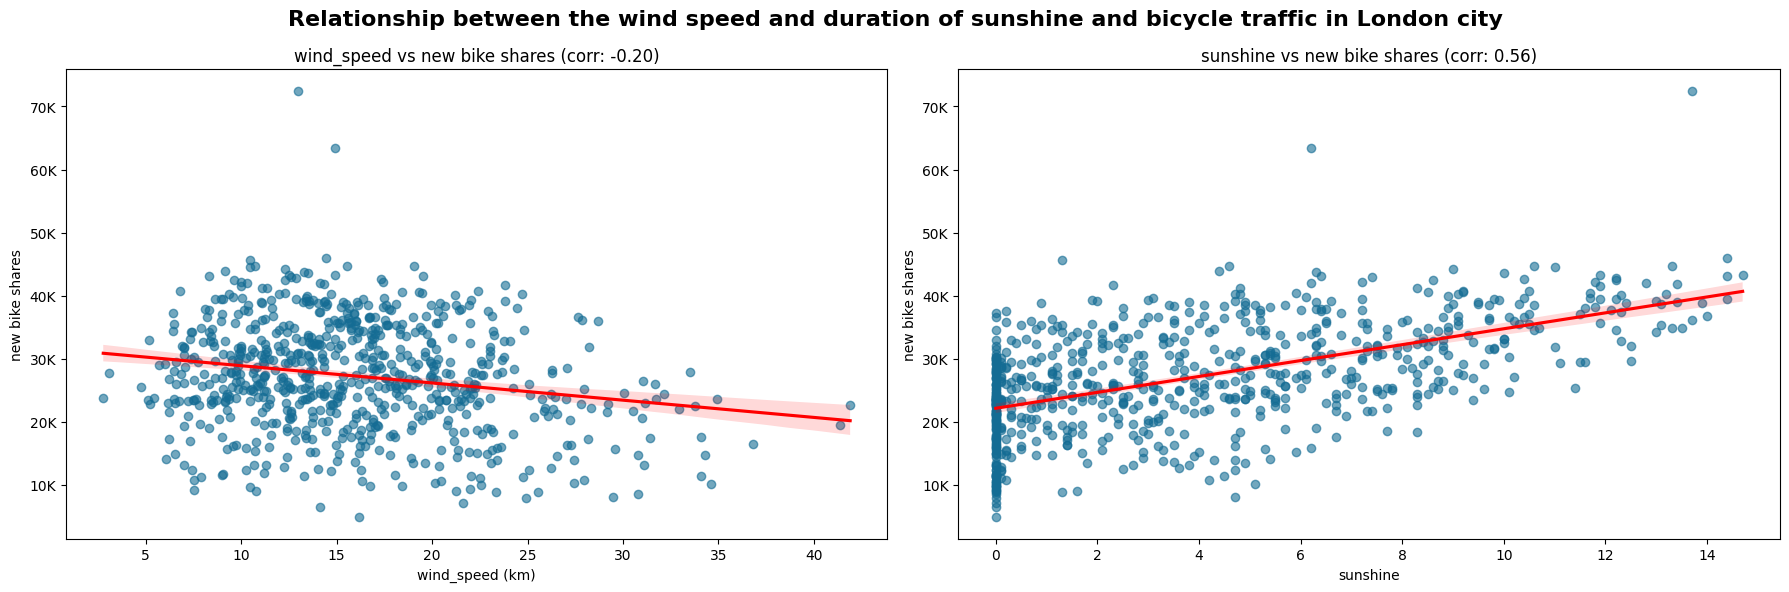

In [698]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, col_details in enumerate([('wind_speed', 'wind_speed (km)'), ('sunshine', 'sunshine')]):
    col, col_name = col_details
    ax = axes[i]
    sns.regplot(data=final_combined_df, x=col, y='new bike shares', ax=ax,
                scatter_kws = {"color": "#146C94", "alpha": 0.6},
                line_kws = {"color": "red"},
                ci = 95)
    
    # Calculate the correlation between temperature (tavg, tmin, tmax) and total_traffic
    correlation = final_combined_df[[col, 'new bike shares']].corr().iloc[0, 1]
    
    ax.set_title(f'{col} vs new bike shares (corr: {correlation:.2f})')
    ax.set_xlabel(col_name)
    ax.set_ylabel('new bike shares')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K' if y >= 1000 else '{:g}'.format(y)))

plt.suptitle('Relationship between the wind speed and duration of sunshine and bicycle traffic in London city', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Wind speed and sunshine duration have distinct effects on the total bicycle traffic in London. There is a reverse relationship between wind speed and bicycle traffic, indicating that as wind speed increases, bicycle traffic tends to decrease, and vice versa. This suggests that strong winds may deter people from cycling or affect their comfort and safety while cycling. On the other hand, there is a positive correlation between sunshine duration and bicycle traffic. As the duration of sunshine increases, bicycle traffic tends to rise, suggesting that favorable weather conditions with more sunlight encourage people to use bicycles for commuting and recreational purposes.

#### 8.6. How do the different seasons impact the total bicycle traffic in London?

To facilitate our analysis based on seasons, we introduced a new column named `season` in our dataset. This addition was prompted by our aim to delve into seasonal variations. The `season` column was created by aligning the months in our `date` column with the distinct seasons of UK. These seasons are demarcated as follows:
- Spring: March to May
- Summer: June to August
- Autumn: September to November
- Winter: December to February

In [699]:
# Create a dictionary to map months to seasons
month_to_season = {
    "03": "Spring", "04": "Spring", "05": "Spring",
    "06": "Summer", "07": "Summer", "08": "Summer",
    "09": "Autumn", "10": "Autumn", "11": "Autumn",
    "12": "Winter", "01": "Winter", "02": "Winter"
}

# Extract the month from the "date" column
final_combined_df["month"] = final_combined_df["date"].apply(lambda x: str(x)[5:7])

# Map months to seasons using the dictionary
final_combined_df["season"] = final_combined_df["month"].map(month_to_season)

# Drop the "month" column
final_combined_df.drop("month", axis=1, inplace=True)


final_combined_df.iloc[100:110, :]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,new bike shares,humidity,wind_speed,is_holiday,is_weekend,season
100,2015-04-11,3.0,7.8,195.0,18.3,11.6,9.0,0.2,101860.0,0.0,25113.0,58.916667,21.687500,0.0,1.0,Spring
101,2015-04-12,2.0,9.2,214.0,17.1,11.4,4.4,0.0,102600.0,0.0,29204.0,58.645833,20.208333,0.0,1.0,Spring
102,2015-04-13,5.0,2.7,125.0,22.2,12.6,8.0,0.2,103060.0,0.0,28048.0,68.770833,9.729167,0.0,0.0,Spring
103,2015-04-14,0.0,12.2,251.0,24.6,14.0,5.7,0.0,102520.0,0.0,34519.0,60.770833,17.166667,0.0,0.0,Spring
104,2015-04-15,0.0,12.3,254.0,17.7,16.7,8.7,0.0,101720.0,0.0,37470.0,51.895833,14.062500,0.0,0.0,Spring
105,2015-04-16,3.0,6.4,184.0,15.6,13.2,8.7,0.0,101550.0,0.0,30489.0,66.958333,19.625000,0.0,0.0,Spring
106,2015-04-17,2.0,7.2,196.0,15.1,12.0,8.4,0.0,102030.0,0.0,29796.0,63.625000,23.645833,0.0,0.0,Spring
107,2015-04-18,1.0,12.5,262.0,12.1,10.1,5.1,0.0,102750.0,0.0,29595.0,63.875000,22.583333,0.0,1.0,Spring
108,2015-04-19,6.0,3.0,136.0,18.8,8.5,4.8,0.0,102510.0,0.0,19736.0,67.812500,11.604167,0.0,1.0,Spring
109,2015-04-20,0.0,12.5,265.0,19.1,11.3,3.7,0.0,102950.0,0.0,32057.0,64.437500,13.854167,0.0,0.0,Spring


To analyze how different seasons impact the total bicycle traffic in London, we can create a violin plot that visualizes the distribution of bicycle traffic for each season. This will allow us to observe any variations in traffic patterns across the four seasons.

C:\Users\Piyal\AppData\Local\Temp\ipykernel_15056\1263636126.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels


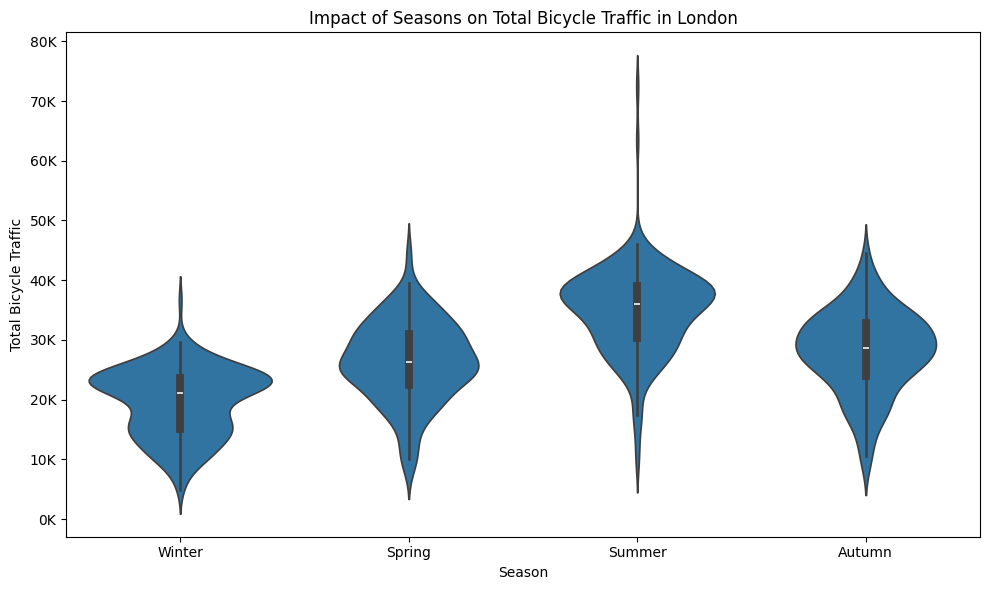

In [700]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_combined_df, x='season', y='new bike shares')

plt.xlabel("Season")
plt.ylabel("Total Bicycle Traffic")
plt.title("Impact of Seasons on Total Bicycle Traffic in London")
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) + 'K' for x in plt.gca().get_yticks()]) # Modify y-axis tick labels
plt.tight_layout()
plt.show()

The study of bike traffic throughout the year in London shows clear seasonal trends. Summer sees a substantial increase in cyclists, likely due to better weather for biking. In contrast, winter has a marked decrease in bicycle use, possibly because of the cold weather. Both spring and autumn exhibit relatively higher bike traffic compared to winter, indicating a steady preference for cycling in these seasons. These findings emphasize the significant impact of weather conditions on cycling habits, with summer being the most popular season for biking and winter the least.

### 9. Conclusion

This study embarked on a detailed investigation into how weather conditions affect bicycle usage in London. The key observations are:

* Temperature is a key determinant of bicycle usage, with warmer temperatures encouraging more cycling and cooler temperatures leading to a decline.
* An inverse relationship was observed between rainfall and bike sharing, with a stronger negative correlation noted with humidity levels.
* Higher wind speeds tend to discourage cycling, whereas extended periods of sunshine have a positive influence.
* A seasonal analysis revealed distinct trends: Summer months witness a significant surge in cycling activity, whereas winter experiences a notable decrease. Both spring and autumn show higher levels of cycling compared to winter, but are similar to each other.

These findings offer critical insights for those involved in urban planning and policy-making, particularly in promoting cycling as an eco-friendly mode of transport. Understanding the influence of weather on cycling habits can guide city officials in developing strategies to enhance London's cycling infrastructure and encourage more people to choose bicycles for their daily commute.